In [1]:
## Importing Required Libraries
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.layers import Dense,Flatten,Dropout,BatchNormalization
from keras.layers import Conv2D,MaxPooling2D,GlobalAveragePooling2D
from keras.applications import MobileNetV2,InceptionResNetV2,VGG16
from keras.preprocessing.image import ImageDataGenerator,array_to_img,img_to_array,load_img

In [5]:
## Data Augmentation
train_datagen=ImageDataGenerator(rescale=1/255.0,zoom_range=0.2,shear_range=0.3,horizontal_flip=True,brightness_range=[0.5,1.5])
test_datagen=ImageDataGenerator(rescale=1/255.0)
val_datagen=ImageDataGenerator(rescale=1/255.0)

In [6]:
#Creating Batch size and Image shape
BATCH_SIZE=32
IMG_SHAPE=(224,224)

In [7]:
#Defining Train, Test and Validation data
train_data=train_datagen.flow_from_directory("../input/fruits-fresh-and-rotten-for-classification/dataset/test",
                                            target_size=IMG_SHAPE,batch_size=BATCH_SIZE,class_mode="binary")

test_data=train_datagen.flow_from_directory("../input/fruits-fresh-and-rotten-for-classification/dataset/train",
                                            target_size=IMG_SHAPE,batch_size=BATCH_SIZE,class_mode="binary")
val_data=train_datagen.flow_from_directory("../input/fruits-fresh-and-rotten-for-classification/dataset/test",
                                            target_size=IMG_SHAPE,batch_size=BATCH_SIZE,class_mode="binary")

Found 2698 images belonging to 6 classes.
Found 10901 images belonging to 6 classes.
Found 2698 images belonging to 6 classes.


In [8]:
train_data.class_indices

{'freshapples': 0,
 'freshbanana': 1,
 'freshoranges': 2,
 'rottenapples': 3,
 'rottenbanana': 4,
 'rottenoranges': 5}

In [9]:
#Dictionary with key and correct values as labels
image_class_dict={0:'freshapples',
 1:'freshbanana',
 2:'freshoranges',
 3:'rottenapples',
 4:'rottenbanana',
 5:'rottenoranges'}

In [10]:
### Ploting Augmented Images
def plot_random_images():
    images,labels=train_data.next()
    plt.figure(figsize=(20,10))
    for i in range(10):
        plt.subplot(2,5,i+1)
        plt.imshow(images[i])
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(image_class_dict[labels[i]])
        

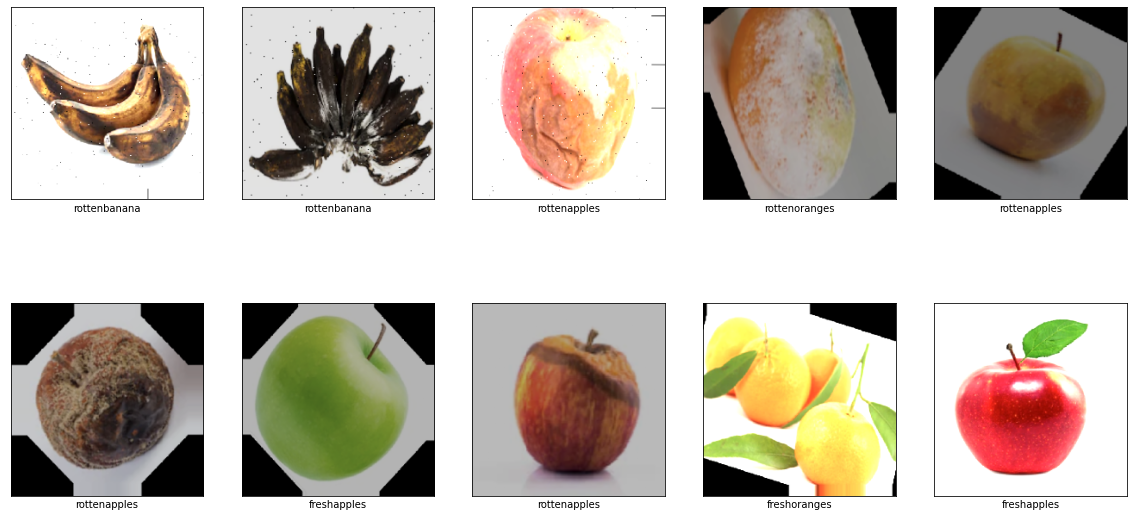

In [11]:
plot_random_images()

In [12]:
#Creating CNN model
cnn_model=tf.keras.models.Sequential([
    Conv2D(16,3,activation="relu",input_shape=(224,224,3)),
    MaxPooling2D(2,2),
    Conv2D(32,3,activation="relu"),
    MaxPooling2D(2,2),
    Conv2D(64,3,activation="relu"),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(100,activation="relu"),
    Dense(1,activation="sigmoid")
])

In [13]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 43264)             0

In [15]:
cnn_model.compile(optimizer="adam",loss="binary_crossentropy",metrics="accuracy")

In [16]:
#Training for 100 EPOCHS

In [17]:
history = cnn_model.fit_generator(train_data,validation_data=(val_data),epochs=100,steps_per_epoch=18,validation_steps=9)

Epoch 1/100
18/18 [==============================] - 32s 2s/step - loss: -628.2574 - accuracy: 0.1509 - val_loss: -13784.9336 - val_accuracy: 0.1319
Epoch 2/100
18/18 [==============================] - 30s 2s/step - loss: -54403.9975 - accuracy: 0.1454 - val_loss: -342945.1562 - val_accuracy: 0.1910
Epoch 3/100
18/18 [==============================] - 28s 2s/step - loss: -1157409.7484 - accuracy: 0.1591 - val_loss: -4438471.0000 - val_accuracy: 0.1424
Epoch 4/100
18/18 [==============================] - 28s 2s/step - loss: -9147677.5000 - accuracy: 0.1104 - val_loss: -32343734.0000 - val_accuracy: 0.1597
Epoch 5/100
18/18 [==============================] - 27s 2s/step - loss: -50487204.7368 - accuracy: 0.1730 - val_loss: -142837952.0000 - val_accuracy: 0.1632
Epoch 6/100
18/18 [==============================] - 27s 1s/step - loss: -197172009.2632 - accuracy: 0.1460 - val_loss: -512027872.0000 - val_accuracy: 0.1354
Epoch 7/100
18/18 [==============================] - 27s 2s/step - loss

In [18]:
cnn_model.evaluate(test_data)

341/341 [==============================] - 329s 964ms/step - loss: -2909859401957376.0000 - accuracy: 0.1450


[-2909859401957376.0, 0.14503256976604462]

Text(0.5, 0, 'Epochs')

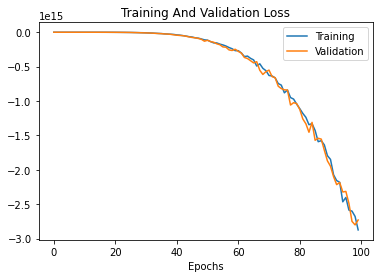

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training','Validation'])
plt.title("Training And Validation Loss")
plt.xlabel("Epochs")

In [20]:
from keras.preprocessing import image
test_image = image.load_img("../input/fruits-fresh-and-rotten-for-classification/dataset/test/freshoranges/Screen Shot 2018-06-12 at 11.50.41 PM.png", target_size = (224,224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn_model.predict(test_image)
print("The test_image is classified as",result[0])
print("The key and value associated are: 0=Fresh, 1=Rotten")



The test_image is classified as [1.]
The key and value associated are: 0=Fresh, 1=Rotten


In [21]:
from keras.preprocessing import image
test_image = image.load_img('../input/fruits-fresh-and-rotten-for-classification/dataset/test/freshapples/Screen Shot 2018-06-08 at 4.59.44 PM.png', target_size = (224,224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
resulty = cnn_model.predict(test_image)
print("The test_image is classified as",resulty)
print("The key and value associated are: 0=Fresh, 1=Rotten")

The test_image is classified as [[1.]]
The key and value associated are: 0=Fresh, 1=Rotten


In [22]:
from keras.preprocessing import image
test_image = image.load_img('../input/fruits-fresh-and-rotten-for-classification/dataset/train/rottenapples/Screen Shot 2018-06-07 at 2.16.41 PM.png', target_size = (224,224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn_model.predict(test_image)
print("The test_image is classified as",result[0])
print("The key and value associated are: 0=Fresh, 1=Rotten")

The test_image is classified as [1.]
The key and value associated are: 0=Fresh, 1=Rotten
